In [51]:
# import standard modules
import numpy as np
import cv2, glob, pickle
import image_helper as ih
import video_helper as vh

# import matplotlib modules
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

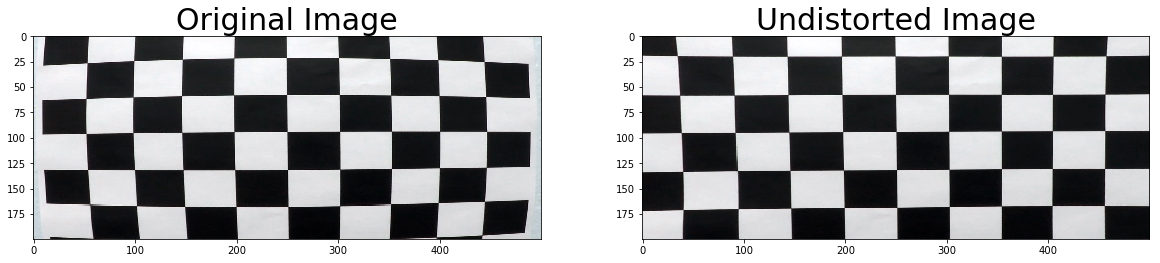

In [49]:
# Test undistortion on an image
img = cv2.imread("./camera_cal/calibration1.jpg")
img_size = (img.shape[1], img.shape[0])

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
objpoints = dist_pickle["objpoints"]
imgpoints = dist_pickle["imgpoints"]
                 
# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)

# undistort the image and save it.
dst = cv2.undistort(img, mtx, dist, None, mtx)
dst = cv2.resize(dst, (500,200))
cv2.imwrite("./calibration1_undistort.jpg",dst)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
img = cv2.resize(img, (500,200))
cv2.imwrite("./calibration1.jpg",img)
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [19]:
# read the test1 image
image = mpimg.imread("test_images/test1.jpg")

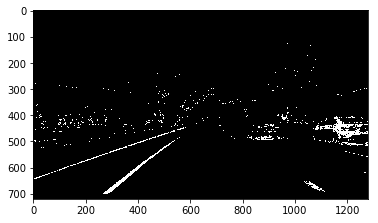

In [50]:
# warp the image after distortion correction
dst = ih.undistort(image)

# apply the combined threshold
binary_combo = ih.combined_threshold(dst,sobel_kernel=13
                                   , sobel_threshold_x_min=150, sobel_threshold_x_max=255
                                   , sobel_threshold_y_min=150, sobel_threshold_y_max=255
                                   , mag_threshold_min=80, mag_threshold_max=255
                                   , dir_threshold_min=1, dir_threshold_max=1.3
                                   , col_threshold_min=200, col_threshold_max=255)
plt.imshow(binary_combo, cmap='gray')
binary_combo = cv2.resize(binary_combo, (500,200))
mpimg.imsave("./binary_combo.jpg", binary_combo, cmap="gray")

In [21]:
straight_line_image = mpimg.imread("test_images/straight_lines1.jpg")

In [23]:
# warp the image after distortion correction
dst = ih.undistort(straight_line_image)
warped, Minv = ih.warp(dst)

# apply the combined threshold
binary_warped = ih.combined_threshold(warped,sobel_kernel=3
                                   , sobel_threshold_x_min=50, sobel_threshold_x_max=255
                                   , sobel_threshold_y_min=50, sobel_threshold_y_max=255
                                   , mag_threshold_min=20, mag_threshold_max=255
                                   , dir_threshold_min=-np.pi/2, dir_threshold_max=np.pi/2
                                   , col_threshold_min=150, col_threshold_max=255)
# fit polynomial
left_fitx, right_fitx, ploty = ih.fit_polynomial(binary_warped=binary_warped, nwindows=15)

C:\Users\syed.mateen\Documents\snmateen\technical\data science\udacity\carnd\CarND-Advanced-Lane-Lines-master\image_helper.py:324: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  histogram = np.sum(binary_warped[binary_warped.shape[0]/2:,:], axis=0)


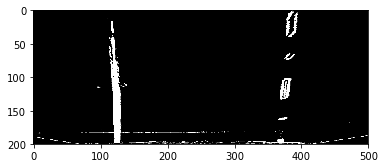

In [61]:
plt.imshow(binary_warped, cmap='gray')
binary_warped = cv2.resize(binary_warped, (500,200))
mpimg.imsave("./binary_warped.jpg",binary_warped, cmap="gray")

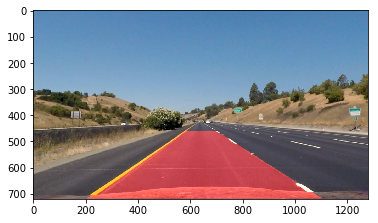

In [46]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(binary_warped).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (255,0, 0))

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(color_warp, Minv, (image.shape[1], image.shape[0])) 

# Combine the result with the original image
result = cv2.addWeighted(dst, 1, newwarp, 0.5, 0)

plt.imshow(result)

In [56]:
final_image = vh.process_image(image)
mpimg.imsave("./lane_drawn.jpg", final_image)